<a href="https://colab.research.google.com/github/Vladislav-GitHub/The-Missing-Semester-of-Your-CS-Education/blob/main/Story_1_Chapter_4_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Обработка данных 📇

Настало время окунуться в данные 📇

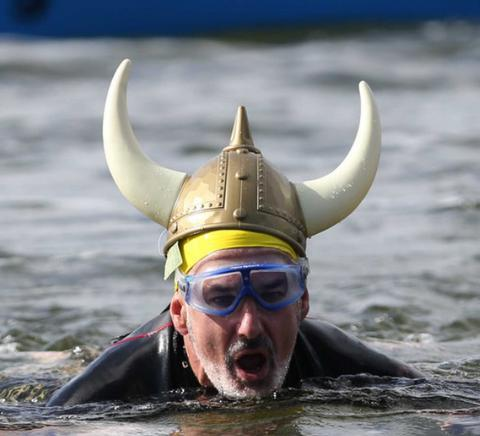

Юный викинг, ты когда-нибудь хотел взять данные 📇 в одном формате и преобразовать их в другой формат, вобщем заняться алхимией и стать местным шаманом? Конечно! Это, в самых общих чертах, о чём эта глава.
В частности, массирование данных 📇, будь то в текстовый или двоичный формат
пока не получите именно то, что хотели.

Мы уже видели споры относительно некоторых базовых данных 📇.
Практически каждый раз, когда вы используете оператор `|`, вы выполняете какую-то операцию обработки данных 📇. Рассмотрим команду типа `journalctl | grep -i intel`.
Она находит все записи логов - записей ваших местных летописцев, в которых упоминается Intel (без уч`та регистра).
Вы можете не думать о ней как об обработке данных 📇, но она преобразовывается из одного формата (весь ваш системный журнал) в более удобный для вас формат
(просто логи Intel) и по сути показывает вам фоновые процессы вашего компьютера. Большая часть обработки данных 📇 связана со знанием того,
какие есть инструменты 🔧 в вашем распоряжении (иначе как вы будете работать на полях, не зная что у вас есть из инструментов 🔧?) и как их объединить.

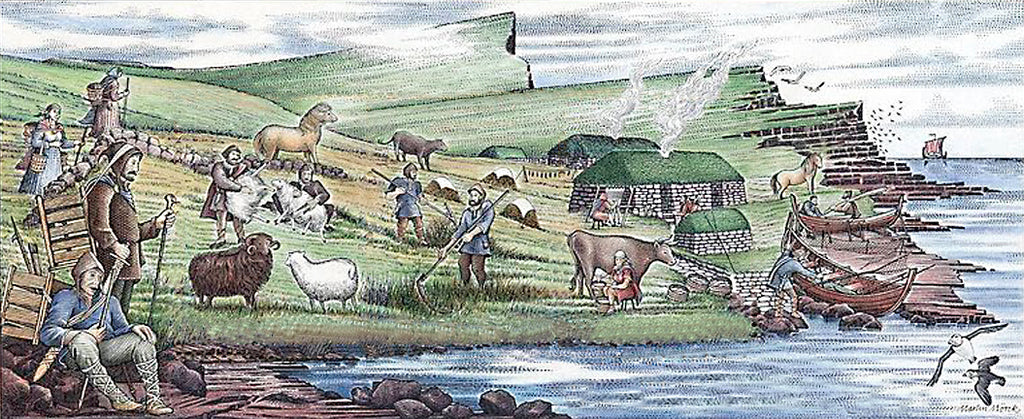

Начнём с самого начала. Чтобы обработать данные 📇, нам нужны две вещи:
данные 📇, которые нужно обработать, и что-то с ними сделать рямо как и во  время посева вам нужно зерно и что-то сделать (правда тут в отличие от данных нетрудно догадаться что делать). Логи часто создаются в качестве хорошего варианта использования потому что вы часто хотите их исследовать, и прочитать всё невозможно. Давайте разберёмся, кто пытается войти на мой сервер, просмотрев журнал моего сервера:


```bash
ssh myserver journalctl
```

Пока слишком много деталей. Давайте ограничимся ssh:

```bash
ssh myserver journalctl | grep sshd
```

Обрати внимание, юный викинг, что мы используем конвейер ⛓️ для потоковой передачи _remote_ файла через `grep` на нашем локальном компьютере!

`ssh` — это волшебство, и мы ещё ближе познакомимся в следующей главе. Здесь всё ещё больше чем мы бы хотели. И это довольно тяжело читать. Давай сделаем лучше:

```bash
ssh myserver 'journalctl | grep sshd | grep "Disconnected from"' | less
```

Зачем дополнительное цитирование? Ну, наши логи/журналы могут быть довольно большими, и это расточительно отправлять всё это на наш компьютер, а затем выполнять фильтрацию.

Вместо этого мы можем выполнить фильтрацию на удалённом сервере, а затем массировать данные 📇 локально. `less` даёт нам "пейджер", который позволяет нам проходить вверх и вниз по длинному выводу. Чтобы сэкономить дополнительный трафик пока мы отлаживаем нашу командную строку, мы даже можем прикрепить текущие отфильтрованные логи в файл, чтобы нам не приходилось иметь доступ к сети во время разработки:

```console
$ ssh myserver 'journalctl | grep sshd | grep "Disconnected from"' > ssh.log
$ less ssh.log
```

Здесь по-прежнему много лишнего. Есть _много_ способов избавиться от этого, но давайте взглянем на один из самых мощных инструментов 🔧 в вашем
инструментарии: `sed`.

`sed` - это «потоковый редактор», созданный на основе старого редактора `ed`.
В нём вы в основном даёте короткие команды для изменения файла, а не
напрямую манипулируете его содержимым (хотя вы тоже можете это делать).
Существует множество команд, но одна из наиболее распространённых — `s`:
замена. Например, мы можем написать:

```bash
ssh myserver journalctl
 | grep sshd
 | grep "Disconnected from"
 | sed 's/.*Disconnected from //'
```

То, что мы только что написали, было простым _регулярным выражением_;
мощная конструкция, позволяющая сопоставлять текст с шаблонами.
Команда `s` записана в форме: `s/REGEX/SUBSTITUTION/`, где `REGEX` — это
регулярное выражение, которое вы хотите найти, а `SUBSTITUTION` — это
текст, которым вы хотите заменить соответствующий текст.

(Вы можете узнать этот синтаксис из раздела «Поиск и замена» нашего
руководства Vim [конспекты лекций](https://github.com/Vladislav-GitHub/The-Missing-Semester-of-Your-CS-Education/blob/main/Story_1_Chapter_3_TopicEditors_(Vim).ipynb)!
Действительно, Vim использует синтаксис для поиска и замены аналогичны
команде подстановки `sed`. Изучение одного инструмента 🔧 часто помогает
вам стать более опытным в использовании других.)

## Регулярные выражения

Регулярные выражения достаточно распространены и полезны, поэтому стоит
потратить некоторое время для того, чтобы понять как они работают. Начнём
с рассмотрения того, что мы использовали выше: `/.*Disconnected from /`.

Регулярные выражения обычно (хотя и не всегда) окружены `/` словно братья/сёстры викинга. Две `/` вы видите ниже с:

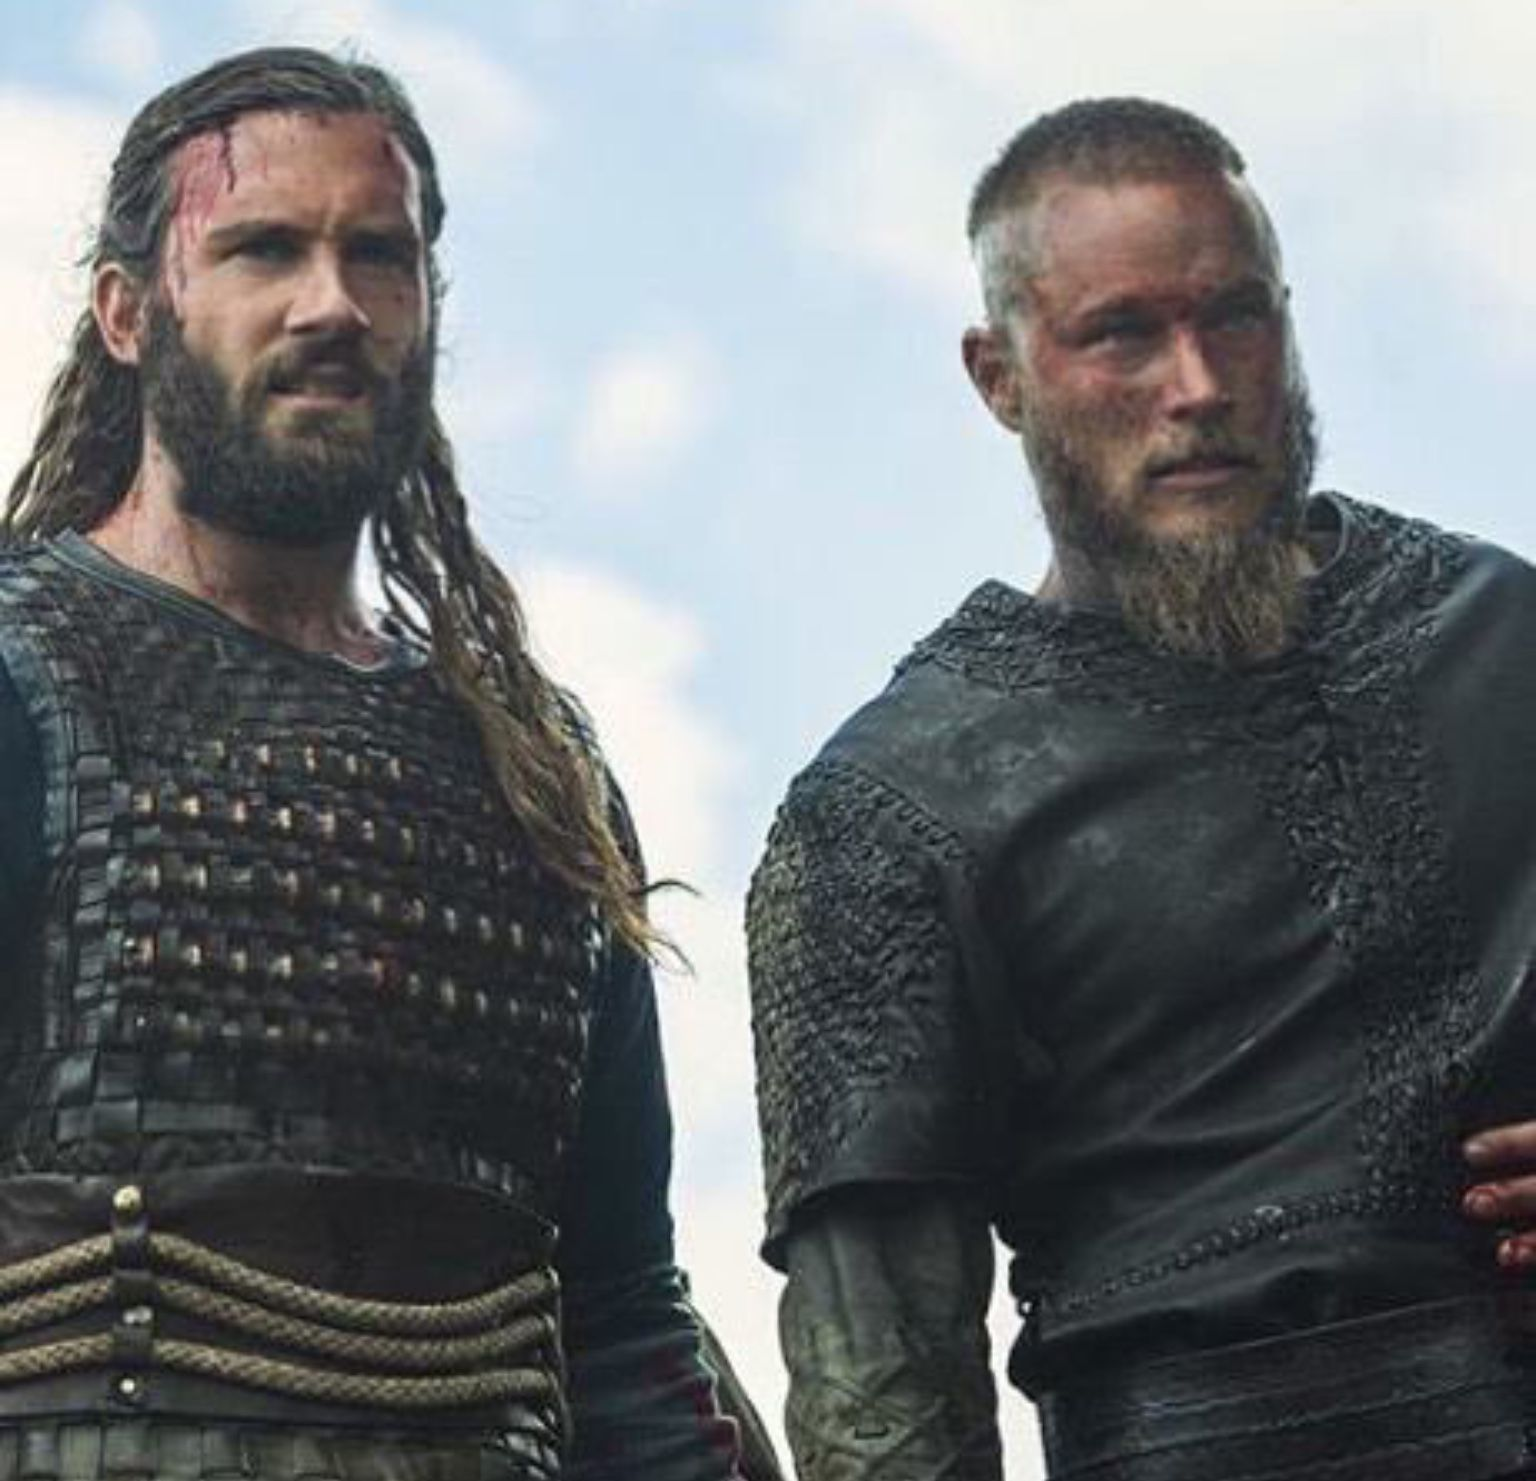

 Большинство символов ASCII просто несут своё обычное значение, но некоторые символы имеют "особое" соответствующее поведение. Какие именно символы что делают несколько различается между различными реализациями регулярных выражений, что является источником большого разочарования. Очень распространены следующие шаблоны:

 - `.` означает "любой одиночный символ", кроме новой строки
 - `*` ноль или более предыдущих совпадений
 - `+` одно или несколько предыдущих совпадений
 - `[abc]` любой символ из `a`, `b` и `c`
 - `(RX1|RX2)` либо что-то, что соответствует `RX1` или `RX2`
 - `^` начало строки
 - `$` конец строки

`sed`'s регулярные выражения несколько странны и потребуют от вас поставить
`\` перед большинством из них, чтобы придать им особое значение (метасимволы по типу \s, \\, \. и т.д.).
Или вы можете поставить `-E`.

Как видите, у викингов тоже есть свои метасимволы.

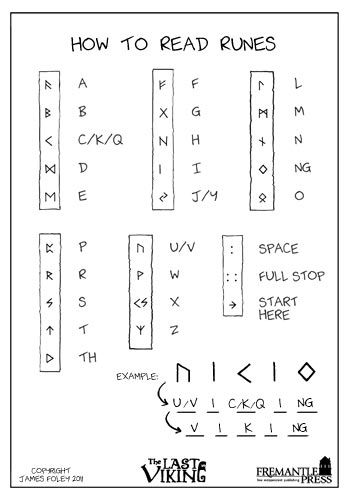



Итак, оглядываясь назад на `/.*Disconnected from /`, мы видим, что он
соответствует любому тексту, который начинается с любого количества символов,
за которым следует литеральная строка "Disconnected from". Это то, что мы хотели.

Но будьте осторожны, регулярные выражения каверзные. Что, если кто-то попытается
войти в систему с именем пользователя "Disconnected from"? У нас будет:

```
Jan 17 03:13:00 thesquareplanet.com sshd[2631]: Disconnected from invalid user Disconnected from 46.97.239.16 port 55920 [preauth]
```

Что бы мы получили в итоге? Ну, `*` и `+` по умолчанию являются "жадными".
Они будут соответствовать как можно большему количеству текста. Итак,
как описано выше, мы в конечном итоге получим всего лишь

```
46.97.239.16 port 55920 [preauth]
```

Возможно, это не то, чего мы хотели. В некоторых реализациях регулярных выражений, вы можете просто добавить к `*` или `+` символ `?`, чтобы сделать их не жадными, но, к сожалению, `sed` этого не поддерживает. Однако мы _могли_ переключиться на режим командной строки Perl, который _поддерживает_ эту конструкцию:

```bash
perl -pe 's/.*?Disconnected from //'
```

В оставшейся части этой лекции мы будем придерживаться `sed`, потому что это гораздо более обычный инструмент 🔧 для такого рода работ. `sed` также может делать и другие полезные вещи, как печать строк после заданного совпадения, выполнение нескольких замен при вызове, поиск вещей и т.д. Но мы не будем рассматривать здесь всё. `sed` — это, по сути, целая тема сама по себе, но зачастую есть инструменты 🔧 получше.

Хорошо, у нас также есть суффикс, от которого мы хотели бы избавиться. Как мы могли бы сделать это? Немного сложно сопоставить только текст после имени пользователя, особенно
если имя пользователя может содержать пробелы и тому подобное! Что нам нужно сделать,
так это сопоставиться с _целой_ строкой:

```bash
 | sed -E 's/.*Disconnected from (invalid |authenticating )?user .* [^ ]+ port [0-9]+( \[preauth\])?$//'
```

Давайте посмотрим, что происходит с [regex отладчик](https://regex101.com/r/qqbZqh/2).

Ладно, начинаем как прежде. Затем мы сопоставляем любой из "пользовательских" вариантов (есть два префикса в логах). Затем мы сопоставляем любую строку символов, где находится имя пользователя. Затем мы сопоставляем любое отдельное слово (`[^ ]+`; любую непустую последовательность символов, не являющихся пробелами). И после слово "port", за которым следует последовательность цифр. Потом, возможно, суффикс `[preauth]`, а затем конец строки.

Обратите внимание, что при использовании этого метода в качестве имени пользователя "Disconnected from" нас больше не смутит. Вы понимаете, почему?

Однако здесь есть одна проблема: весь лог становится пустым. В конце концов, мы хотим _сохранить_ имя пользователя. Для этого мы можем использовать группы захвата". Любой
текст, соответствующий регулярному выражению, окруженный круглыми скобками хранится в
пронумерованной группе захвата. Они доступны в замене (а в некоторых движках даже в
самой схеме!) как `\1`, `\2`, `\3` и т. д. Итак:

```bash
 | sed -E 's/.*Disconnected from (invalid |authenticating )?user (.*) [^ ]+ port [0-9]+( \[preauth\])?$/\2/'
```

Как вы, наверное, можете себе представить, вы можете придумать _действительно_
сложные регулярные выражения.

Например, вот статья о том, как вы можете сопоставить [адрес электронной почты](https://www.regular-expressions.info/email.html).

Это [не легко](https://web.archive.org/web/20221223174323/http://emailregex.com/).

И есть [много обсуждений](https://stackoverflow.com/questions/201323/how-to-validate-an-email-address-using-a-regular-expression/1917982).

И люди [написали тесты](https://fightingforalostcause.net/content/misc/2006/compare-email-regex.php).

И [тестовые матрицы](https://mathiasbynens.be/demo/url-regex).

Вы можете даже написать регулярное выражение для определения того, является ли данное число [простым числом](https://www.noulakaz.net/2007/03/18/a-regular-expression-to-check-for-prime-numbers/).

Регулярные выражения, как известно, сложны в верном написании, но они также
очень удобны для того, чтобы иметь в своём инструментарии!

## Вернёмся к обработке данных

Хорошо, теперь у нас есть

```bash
ssh myserver journalctl
 | grep sshd
 | grep "Disconnected from"
 | sed -E 's/.*Disconnected from (invalid |authenticating )?user (.*) [^ ]+ port [0-9]+( \[preauth\])?$/\2/'
```

`sed` может делать много других интересных вещей, например, вставлять текст
(с помощью команды `i`), явная печать строк (с помощью команды `p`), выбирать
строки по индексу и многое другое. Проверьте `man sed`!

В любом случае. Теперь мы имеем список всех имён пользователей, которые
попытались войти в систему. Но это бесполезно. Давайте искать обобощённые:

```bash
ssh myserver journalctl
 | grep sshd
 | grep "Disconnected from"
 | sed -E 's/.*Disconnected from (invalid |authenticating )?user (.*) [^ ]+ port [0-9]+( \[preauth\])?$/\2/'
 | sort | uniq -c
```

`sort` отсортирует входные данные 📇. `uniq -c` будет сворачивать последовательные
одинаковые строки в одну строку с префиксом количества вхождений. Мы, вероятно,
тоже хотим отсортировать это и оставить только наиболее распространённые имена
пользователей:

```bash
ssh myserver journalctl
 | grep sshd
 | grep "Disconnected from"
 | sed -E 's/.*Disconnected from (invalid |authenticating )?user (.*) [^ ]+ port [0-9]+( \[preauth\])?$/\2/'
 | sort | uniq -c
 | sort -nk1,1 | tail -n10
```

`sort -n` будет сортировать в числовом (а не лексикографическом) порядке. `-k1,1`
означает "сортировать только по первому столбцу, разделенному пробелами". `, n`
часть говорит: "Сортировать до n-го поля, где по умолчанию находится конец
линия". В этом _конкретном_ примере сортировка по всей строке не имеет значения,
но мы здесь, чтобы учиться!

Если бы нам нужны были _наименее_ распространенные_, мы могли бы использовать `head`
вместо `tail`. Также есть `sort -r`, который сортирует в обратном порядке.

Хорошо, это довольно круто, но что, если мы хотим, чтобы они извлекали только имена пользователей в виде списка, разделённого запятыми, а не по одному в строке, возможно, для конфигурационного файла?

```bash
ssh myserver journalctl
 | grep sshd
 | grep "Disconnected from"
 | sed -E 's/.*Disconnected from (invalid |authenticating )?user (.*) [^ ]+ port [0-9]+( \[preauth\])?$/\2/'
 | sort | uniq -c
 | sort -nk1,1 | tail -n10
 | awk '{print $2}' | paste -sd,
```

Если вы используете macOS: обратите внимание, что показанная команда не будет
работать с BSD `paste` поставляемой в macOS. См. [упражнение 4 из инструментов 🔧
Скрипты Shell](https://github.com/Vladislav-GitHub/The-Missing-Semester-of-Your-CS-Education/blob/main/Story_1_Chapter_2_Shell_Tools_and_Scripting.ipynb), чтобы узнать больше о
разнице между BSD и GNU coreutils, а также инструкции по установке GNU coreutils
на macOS.

Начнем с `paste`: она позволяет объединять строки (`-s`) по заданному значению,
односимвольный разделитель (в данном случае `-d`; `,`). Но что делает `awk`?

`awk` созвучно с hawk ("орёл")

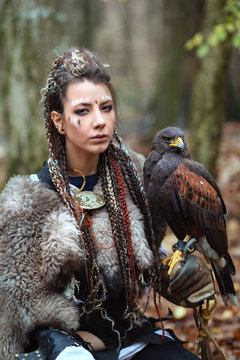

## awk -- другой редактор

`awk` — это язык программирования, который действительно хорошо справляется
с обработкой текстовых потоков. _Много чего_ можно было бы сказать о `awk`,
чтобы изучить должным образом, но, как и с многими другими вещами здесь,
мы просто изучим основы.

Во-первых, что делает `{print $2}`? Ну, программы `awk` принимают форму
необязательного шаблона плюс блока, говорящего, что делать, если шаблон
соответствует заданной строке. Шаблон по умолчанию (который мы использовали
выше) соответствует всем линиям. Внутри блока, `$0` устанавливается на всё
содержимое строки, и от \$1 до \$n устанавливаются в n-е _поле_ этой строки,
когда разделены разделены полевым разделителем `awk` (пробелы по умолчанию,
измените с `-F`). В данном случае мы говорим для каждой строки вывести
содержимое второго поля, которое является именем пользователя!

Посмотрим, сможем ли мы сделать что-нибудь более изысканное. Давайте посчитаем
количество одноразовых имён пользователей, которые начинаются с `c` и
заканчиваются на `e`:

```bash
 | awk '$1 == 1 && $2 ~ /^c[^ ]*e$/ { print $2 }' | wc -l
```

Здесь есть что раскрыть. Во-первых, обратите внимание, что теперь
у нас есть шаблон (то, что идет перед `{...}`). В шаблоне сказано,
что первое поле строки должно быть равно 1 (это счётчик из `uniq
-c`), и что второе поле должно соответствовать заданному обычному
выражению. И блок просто говорит напечатать имя пользователя.
Затем мы считаем количество строк в выводе с помощью `wc -l`.

Однако `awk` — это язык программирования, помните?

```awk
BEGIN { rows = 0 }
$1 == 1 && $2 ~ /^c[^ ]*e$/ { rows += $1 }
END { print rows }
```

`BEGIN` — это шаблон, который соответствует началу ввода (и `END`
соответствует концу). Теперь построчный блок просто добавляет счётчик
из первого поля (хотя в этом случае он всегда будет равен 1), а затем
печатает его в конце. Фактически, мы _могли_ избавиться от `grep` и `sed`
полностью, потому что `awk` [может это сделать полностью](https://backreference.org/2010/02/10/idiomatic-awk/), но оставим это в качестве упражнения читателю.

## Анализ данных

Вы можете выполнять математические вычисления прямо в своей оболочке,
используя `bc`, калькулятор, который может читать из STDIN! Например,
сложите числа в каждой строке путём конкатенирования их вместе, разделяя
их знаком `+`:

```bash
 | paste -sd+ | bc -l
```

Или создайте более сложные выражения:

```bash
echo "2*($(data | paste -sd+))" | bc -l
```

Статистику можно получить разными способами.
[`st`](https://github.com/nferraz/st) — это довольно здорово, но если
у вас уже есть [R](https://www.r-project.org/):

```bash
ssh myserver journalctl
 | grep sshd
 | grep "Disconnected from"
 | sed -E 's/.*Disconnected from (invalid |authenticating )?user (.*) [^ ]+ port [0-9]+( \[preauth\])?$/\2/'
 | sort | uniq -c
 | awk '{print $1}' | R --no-echo -e 'x <- scan(file="stdin", quiet=TRUE); summary(x)'
```

R — еще один (странный) язык программирования, который отлично подходит
для анализа данных и [построения графиков](https://ggplot2.tidyverse.org/).
Мы не будем вдаваться в подробности, но достаточно сказать, что `summary`
печатает сводную статистику для вектора, и мы создали вектор, содержащий
входной поток чисел, поэтому R даёт нам ту статистику, которую мы хотели!

Если вам просто нужно простое построение графиков, `gnuplot` — ваш друг:

```bash
ssh myserver journalctl
 | grep sshd
 | grep "Disconnected from"
 | sed -E 's/.*Disconnected from (invalid |authenticating )?user (.*) [^ ]+ port [0-9]+( \[preauth\])?$/\2/'
 | sort | uniq -c
 | sort -nk1,1 | tail -n10
 | gnuplot -p -e 'set boxwidth 0.5; plot "-" using 1:xtic(2) with boxes'
```

## Обработка данных для создания аргументов

Иногда вам нужно провести обработку данных, чтобы найти что-то для
установки или удалить на основе более длинного списка. Обработка
данных, о которой мы говорили на данный момент + `xargs` может быть
мощной комбинацией.

Например, как показано в лекции, я могу использовать следующую команду
для удаления старых сборок Rust из моей системы, извлекая имена старых
сборок, используя инструменты 🔧 обработки данных 📇, а затем передавая их
через `xargs` в деинсталлятор:

```bash
rustup toolchain list | grep nightly | grep -vE "nightly-x86" | sed 's/-x86.*//' | xargs rustup toolchain uninstall
```

## Обработка двоичных данных

До сих пор, мы в основном говорили об обработке текстовых данных, но
конвейеры столь же полезны для двоичных данных. Например, мы можем использовать
ffmpeg для захвата изображения с нашей камеры, преобразовать его в оттенки
серого, сжать, отправьте его на удаленную машину через SSH, распаковать там,
сделайте копию, а затем отобразить его.

```bash
ffmpeg -loglevel panic -i /dev/video0 -frames 1 -f image2 -
 | convert - -colorspace gray -
 | gzip
 | ssh mymachine 'gzip -d | tee copy.jpg | env DISPLAY=:0 feh -'
```

# Упражнения

1. Пройдите [short interactive regex tutorial](https://regexone.com/).
2. Найдите количество слов (в `/usr/share/dict/words`), содержащие
   минимум три буквы `a` и не имеющие окончания `'s`.

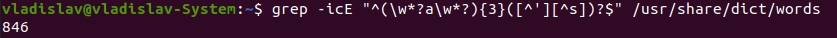

Какие три наиболее распространённые последние две буквы этих слов? `sed`'s `y`
команда или программа `tr` может помочь вам с нечувствительностью к регистру.

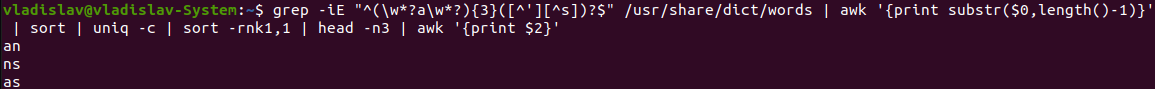

Сколько из этих двухбуквенных комбинаций есть? И ради вызова: какие комбинации не встречаются?

3. Чтобы выполнить замену на месте, весьма заманчиво сделать что-то вроде
   `sed s/REGEX/SUBSTITUTION/ input.txt > input.txt`. Однако это
   плохая идея, почему? Это особенность `sed`? Используйте `man sed`,
   чтобы узнать как это сделать.

4. Найдите среднее, медианное и максимальное время загрузки системы за
   последние десять запусков. Используйте `journalctl` в Linux и `log show`
   в macOS, и посмотрите логи временных меток в начале и в конце каждой
   загрузки. В Linux, они могут выглядеть примерно так:
   
   ```
   Logs begin at ...
   ```
   and
   ```
   systemd[577]: Startup finished in ...
   ```
   В macOS, [ищите](https://eclecticlight.co/2018/03/21/macos-unified-log-3-finding-your-way/):
   ```
   === system boot:
   ```
   и
   ```
   Previous shutdown cause: 5
   ```
5. Ищите загрузочные сообщения, которые _не_ являются общими для трёх
   последних перезагрузок (см. флаг `-b` `journalctl`). Разбейте эту
   задачу на несколько шагов. Во-первых, найдите способ получить только
   логи из прошлых трёх запусков. На том, что вы используете, извлеките
   логи загрузок или вы можете использовать `sed '0,/STRING/d'` для
   удаления всех строк, предшествующих строке, соответствующей `STRING`.
   Далее удалите все части строки, которые _всегда_ меняются (например,
   временная метка). Затем, дедуплицируйте входные строки и ведите
   подсчёт каждой из них (`uniq` ваш друг). И, наконец, удалите любую
   строку, счётчик которой равен 3 (поскольку он _был_ общим для всех
   загрузок).
6. Найдите онлайн-набор данных, подобный [этому](https://stats.wikimedia.org/EN/TablesWikipediaZZ.htm),
   [этому](https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/topic-pages/tables/table-1),
   или, может быть, [отсюда](https://www.springboard.com/blog/data-science/free-public-data-sets-data-science-project/).
   Получите его с помощью `curl` и извлеките только два столбца
   числовых значений данных. Если вы получаете данные 📇 HTML, [`pup`](https://github.com/EricChiang/pup)
   может оказаться полезным. Для JSON данных, попробуйте [`jq`](https://stedolan.github.io/jq/).
   Найдите минимальное и максимальное одного столбца одной командой и разницу сумм каждого столбца другой командой.